# House Property Sales Time Series

## About Dataset
### Context

A multivariate time series has more than one time-dependent variable. Each variable depends not only on its past values but also has some dependency on other variables.

We have accumulated property sales data for the 2007-2019 period for one specific region. The data contains sales prices for houses and units with 1,2,3,4,5 bedrooms. These are the cross-depended variables. The chart illustrates these variables for houses:

## Column Describe 
 - postcode (4 digit postcode of the suburb where the property was sold) int
 - price (Price for which the property was sold) int
 - propertyType (Property type i.e. house or unit) string
 - bedrooms (Number of bedrooms) int

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l1, l2
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Reading The Data

In [7]:
data = pd.read_csv("../data/raw_sales.csv")
data.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [9]:
data.describe()

,postcode,price,bedrooms
count,29580.000000,2.958000e+04,29580.000000
mean,2730.249730,6.097363e+05,3.250169
std,146.717292,2.817079e+05,0.951275
min,2600.000000,5.650000e+04,0.000000
25%,2607.000000,4.400000e+05,3.000000
50%,2615.000000,5.500000e+05,3.000000
75%,2905.000000,7.050000e+05,4.000000
max,2914.000000,8.000000e+06,5.000000


# Setup Data

In [13]:
data["datesold"] =  pd.to_datetime(data['datesold'])
data.set_index('datesold', inplace=True)
data.head()

,postcode,price,propertyType,bedrooms
datesold,,,,
2007-02-07,2607,525000,house,4
2007-02-27,2906,290000,house,3
2007-03-07,2905,328000,house,3
2007-03-09,2905,380000,house,4
2007-03-21,2906,310000,house,3


In [19]:
data["year"] = data.index.year
data["month"] = data.index.month
data["day"] = data.index.day
data.head()

,postcode,price,propertyType,bedrooms,year,month,day
datesold,,,,,,,
2007-02-07,2607,525000,house,4,2007,2,7
2007-02-27,2906,290000,house,3,2007,2,27
2007-03-07,2905,328000,house,3,2007,3,7
2007-03-09,2905,380000,house,4,2007,3,9
2007-03-21,2906,310000,house,3,2007,3,21


# Visualisasi

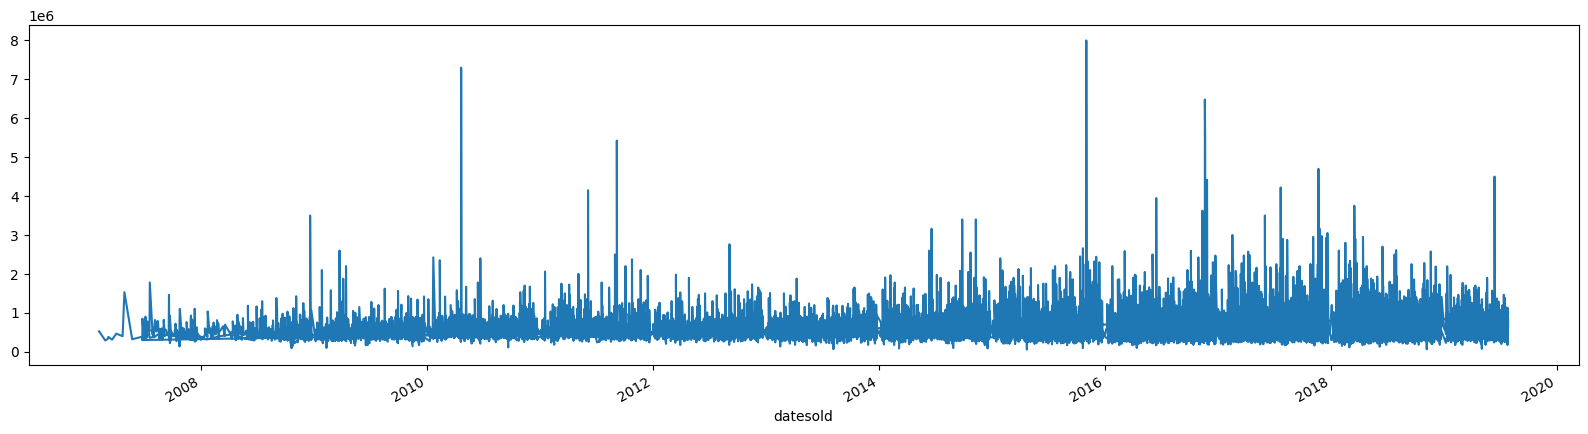

In [23]:
data['price'].plot(figsize=(20,5))
plt.show()

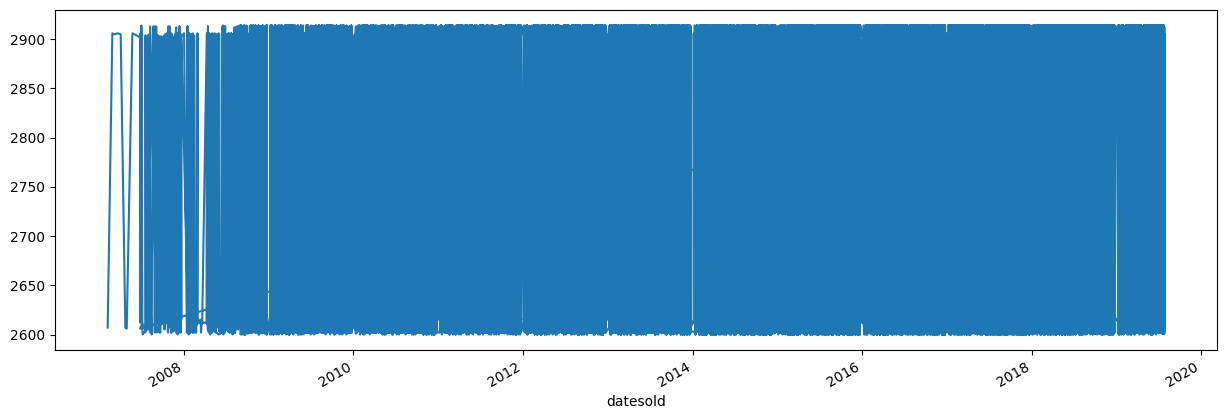

In [27]:
data['postcode'].plot(figsize=(15,5))
plt.show()

In [5]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Contoh dataset
data = {'Kategori': ['A', 'B', 'C', 'A'],
        'Umur': [25, 30, 22, 35],
        'Pendapatan': [50000, 60000, 45000, 80000],
        'Target': [0, 1, 0, 1]}  # Ini label/target prediksi

df = pd.DataFrame(data)

# ==== One-hot encoding untuk fitur kategorikal ====
encoder = OneHotEncoder(sparse_output=False)

# Encode fitur 'Kategori'
kategori_encoded = encoder.fit_transform(df[['Kategori']])

# Gabung hasil encoding ke dataframe
df_encoded = pd.concat([df.drop('Kategori', axis=1),
                        pd.DataFrame(kategori_encoded, columns=encoder.get_feature_names_out())], axis=1)

# ==== Scale fitur numerik ====
scaler = MinMaxScaler()
numerik_features = ['Umur', 'Pendapatan']

# Scale fitur numerik
df_encoded[numerik_features] = scaler.fit_transform(df_encoded[numerik_features])

# ==== Pisahin fitur dan label (X dan y) ====
X = df_encoded.drop('Target', axis=1)  # Fitur (input)
y = df_encoded['Target']  # Label (output)

# ==== Split data jadi train-test ====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Liat hasil X_train dan X_test
print("X_train:\n", X_train)
print("X_test:\n", X_test)
print("y_train:\n", y_train)
print("y_test:\n", y_test)


X_train:
        Umur  Pendapatan  Kategori_A  Kategori_B  Kategori_C
3  1.000000    1.000000         1.0         0.0         0.0
0  0.230769    0.142857         1.0         0.0         0.0
2  0.000000    0.000000         0.0         0.0         1.0
X_test:
        Umur  Pendapatan  Kategori_A  Kategori_B  Kategori_C
1  0.615385    0.428571         0.0         1.0         0.0
y_train:
 3    1
0    0
2    0
Name: Target, dtype: int64
y_test:
 1    1
Name: Target, dtype: int64
